### PROJET COVID-19 REPARTITION GEOGRAPHIQUE DANS LE MONDE ENTIER 14/12/2020

#### SOMMAIRE:  

##### 1 - Compréhension Métier
##### 2 - Compréhension des Données
##### 3 - Traitement des Données
##### 4 - Visualisation des données
##### 5 - Modélisation des données
##### 6 - Conclusion

##### 1 - Compréhension Métier
   Notre Dataset porte sur la pandémie du COVID-19 dans le monde. nous allons identifier les zones à risque élevé, analyser les tendances d'infection,la corrélation avec les mesures de confinement, et la recommandation de stratégies basées sur ces données pour mieux gérer la propagation du virus. 

  

##### 2 - Compréhension des données
###### Nous allons :

###### Importer les Bibliothèques nécessaires
###### Charger les données du Dataset
###### Explorer les données du Dataset
###### Afficher le nombre de lignes et de colonnes du dataset
###### Observer les colonnes et leurs significations
###### Définir le types de données

In [10]:
# Importons les librairies nécessaires
from sklearn.impute import KNNImputer
import pandas as pd
import missingno as mno 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Spécifions le chemin vers notre fichier Excel
chemin_fichier_excel = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx"

# Utilisons la foction read_Excel pour importer le fichier Excel 
df = pd.read_excel (chemin_fichier_excel)

In [2]:
# Copie du dataset
#df = df.copy()
data = df.copy()

In [4]:
data.year.unique()

array([2020, 2019], dtype=int64)

In [5]:
data[data.year==2019] 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
339,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
965,2019-12-31,31,12,2019,0,0,Algeria,DZ,DZA,43053054.0,Africa,NaN
2666,2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,2957728.0,Europe,NaN
3283,2019-12-31,31,12,2019,0,0,Australia,AU,AUS,25203200.0,Oceania,NaN
3633,2019-12-31,31,12,2019,0,0,Austria,AT,AUT,8858775.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55846,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,69625581.0,Asia,NaN
58377,2019-12-31,31,12,2019,0,0,United_Arab_Emirates,AE,ARE,9770526.0,Asia,NaN
58727,2019-12-31,31,12,2019,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
59350,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


###### Exploration des données

In [114]:
# Afficher les premières lignes du dataset
df.head(10)     

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [115]:
# Afficher les dernières lignes de notre dataset
df.tail(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61890,2020-03-30,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61891,2020-03-29,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61892,2020-03-28,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61893,2020-03-27,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61894,2020-03-26,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61899,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [116]:
# Afficher le nombre de lignes et de colonnes
df.shape

(61900, 12)

In [117]:
# Afficher la structure du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [118]:

# Afficher les types de données
df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

In [119]:



# Afficher la liste des noms de colonnes
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [120]:

# Afficher les statistiques descriptives de notre dataset
df.describe()

,dateRep,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,2020-07-17 19:05:51.508885248,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
min,2019-12-31 00:00:00,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,2020-05-07 00:00:00,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,2020-07-20 00:00:00,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,2020-10-02 00:00:00,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,2020-12-14 00:00:00,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210
std,NaN,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240


In [121]:



# Afficher une vue complète des statistiques descriptives
df.describe(include="all")

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900,61625,61777,6.177700e+04,61900,59021.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,214,213,212,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,South_Korea,SG,KOR,NaN,Europe,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,350,350,350,NaN,17372,NaN
mean,2020-07-17 19:05:51.508885248,15.628934,7.067157,2019.998918,1155.147237,26.055460,NaN,NaN,NaN,4.098770e+07,NaN,66.320586
min,2019-12-31 00:00:00,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,NaN,NaN,NaN,8.150000e+02,NaN,-147.419587
25%,2020-05-07 00:00:00,8.000000,5.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,1.293120e+06,NaN,0.757526
50%,2020-07-20 00:00:00,15.000000,7.000000,2020.000000,15.000000,0.000000,NaN,NaN,NaN,7.169456e+06,NaN,6.724045
75%,2020-10-02 00:00:00,23.000000,10.000000,2020.000000,273.000000,4.000000,NaN,NaN,NaN,2.851583e+07,NaN,52.572719
max,2020-12-14 00:00:00,31.000000,12.000000,2020.000000,234633.000000,4928.000000,NaN,NaN,NaN,1.433784e+09,NaN,1900.836210


In [122]:
# Afficher le nombre de valeurs nulles(ou manquantes)
print(df.isnull().sum())

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64


In [123]:
df.shape

(61900, 12)

In [124]:





print("nombre de lignes : ",df.shape[0])
print("nombre de colonnes : ",df.shape[1])

nombre de lignes :  61900
nombre de colonnes :  12


In [125]:



# Afficher le pourcentage des valeurs nulles dans chaque colonne
(df.isnull()
 .sum()/df.shape[0])*100

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444265
countryterritoryCode                                          0.198708
popData2019                                                   0.198708
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.651050
dtype: float64

In [126]:
# Afficher les valeurs dupliquées
print(df.duplicated().sum())

0


###### 3 - Traitement des données
###### Objectif:  
###### - Analyser l'évolution temporelle des cas de COVID-19
###### - Analyser le nombre de cas et de décès liés au virus
###### - Regrouper les données par continent pour une analyse géographique
###### - Evaluer l'incidence du virus par rapport à la population

###### 3.1- Néttoyage des données

In [127]:
# Suppressions des colonnes inappropriées
columns = ['geoId', 'countryterritoryCode']
for column in columns:
    df = df.drop(column, axis=1)

In [128]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

<Axes: >

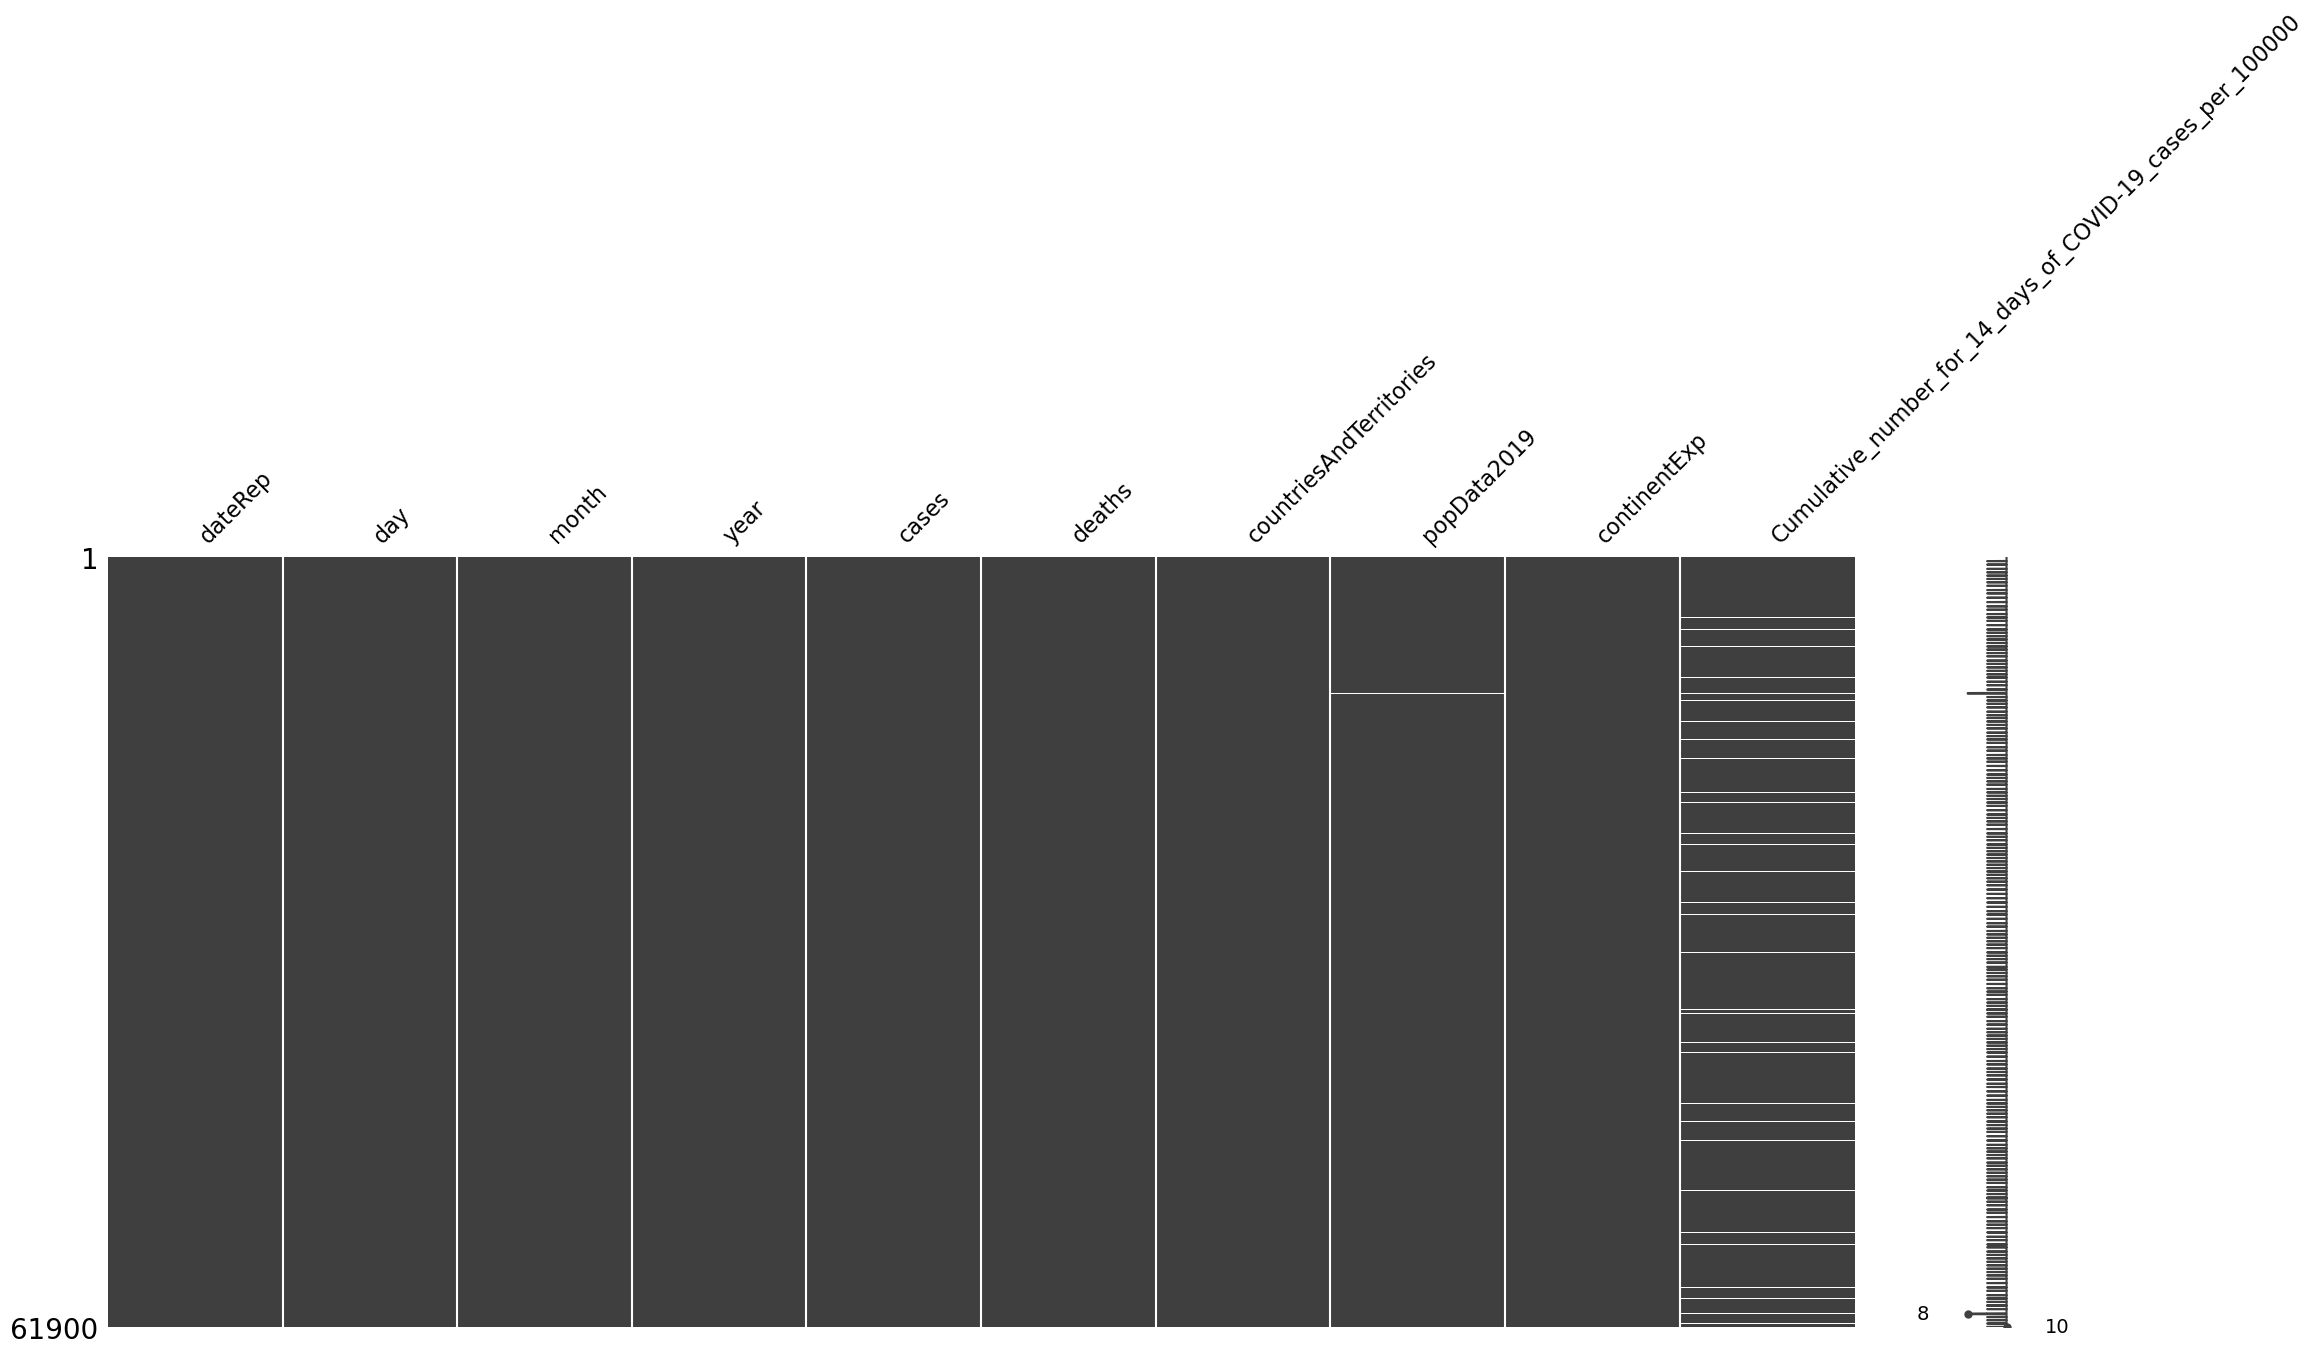

In [129]:
# Vérification des valeurs manquante par graphique
mno.matrix(df)

In [130]:

# Suppression des valeurs manquantes
median = df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].median()
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(median, inplace=True)

In [131]:
median = df['popData2019'].median()
df['popData2019'].fillna(median, inplace=True)

In [132]:
# Renommer la colonne
df = df.rename(columns={"Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cumulative_cases_for_14_days_per_100000"})

<Axes: >

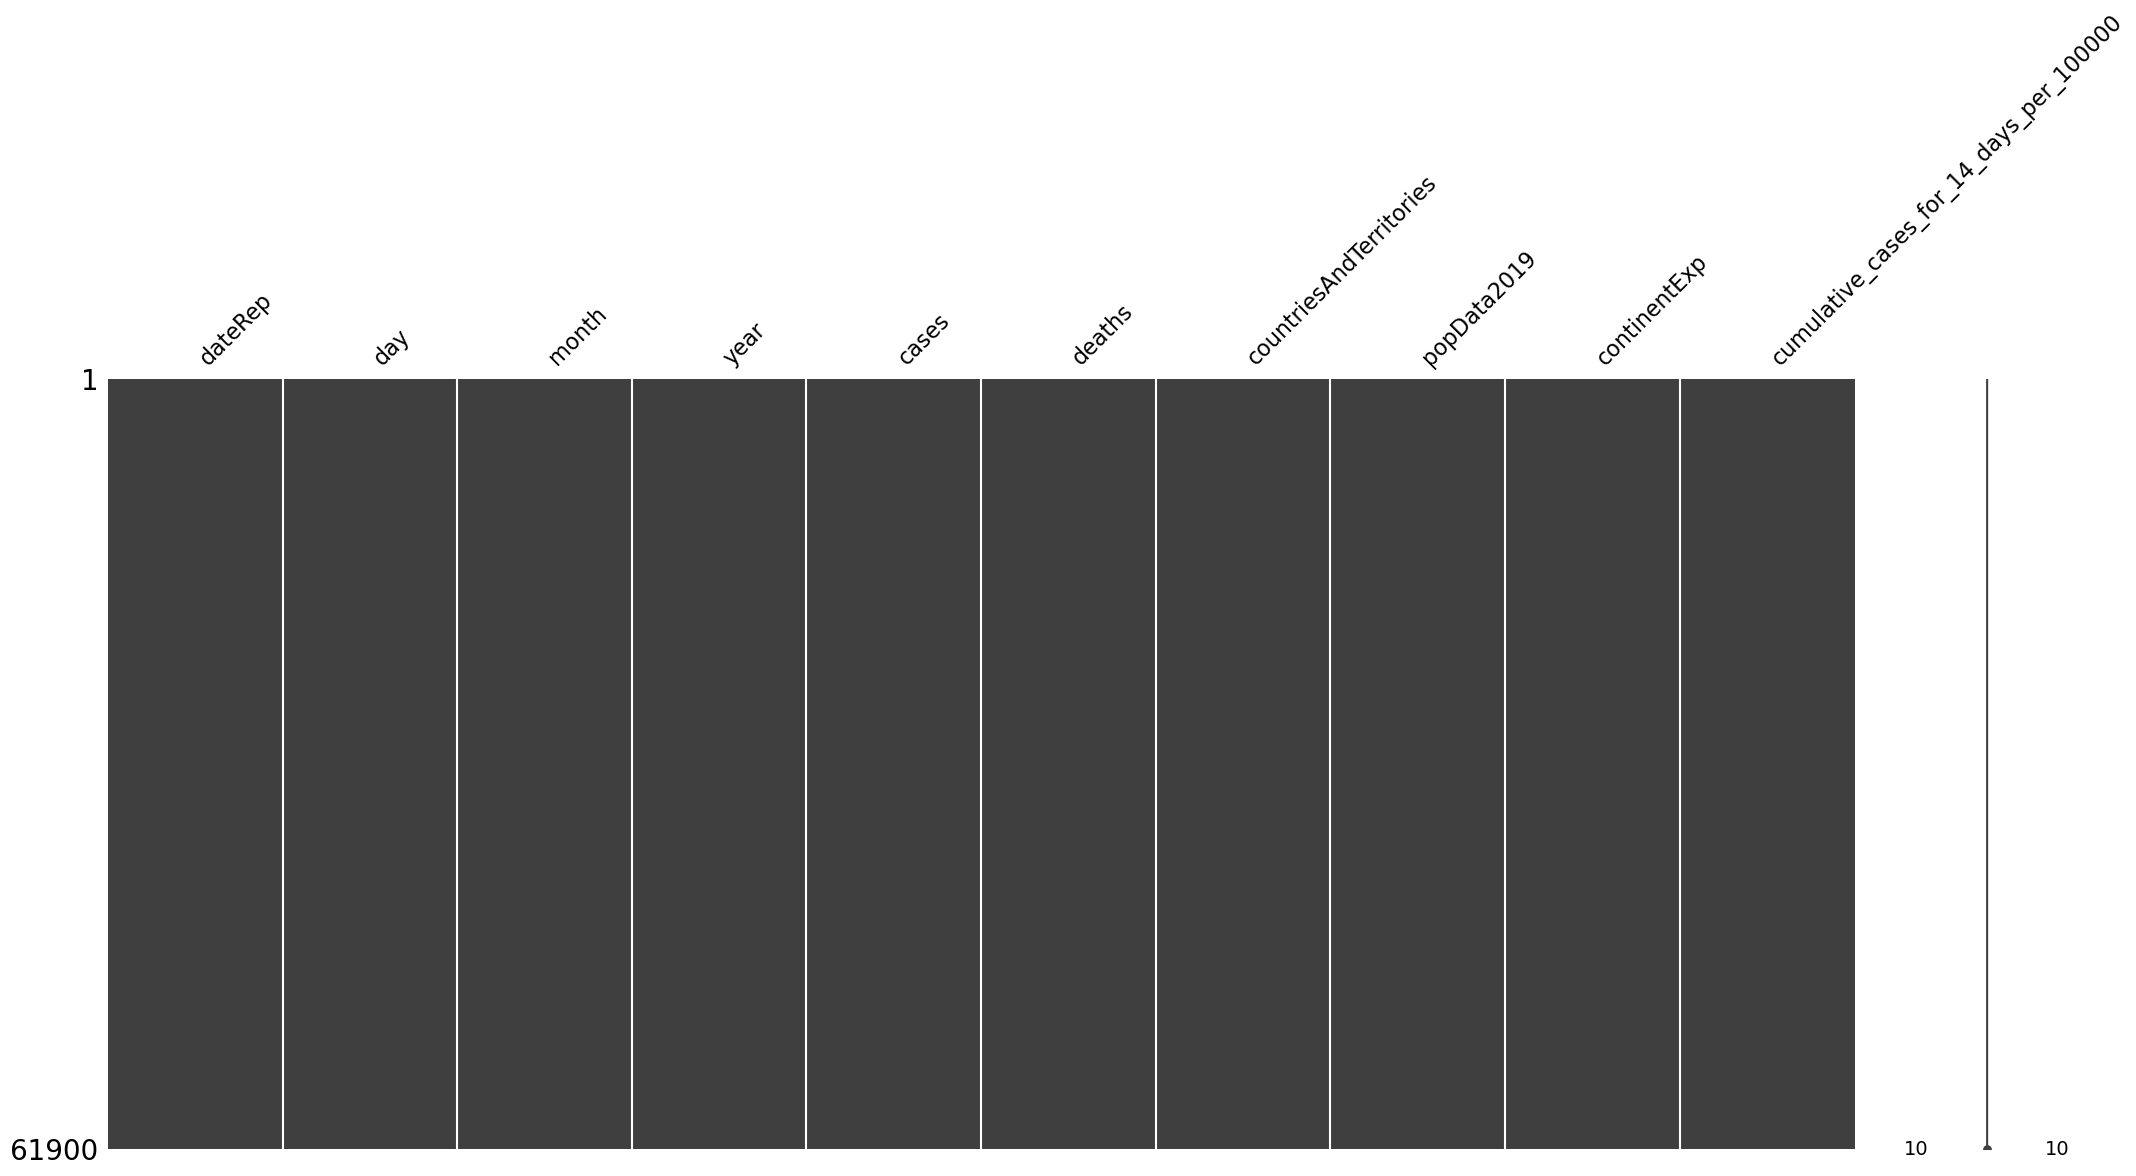

In [133]:
mno.matrix(df)

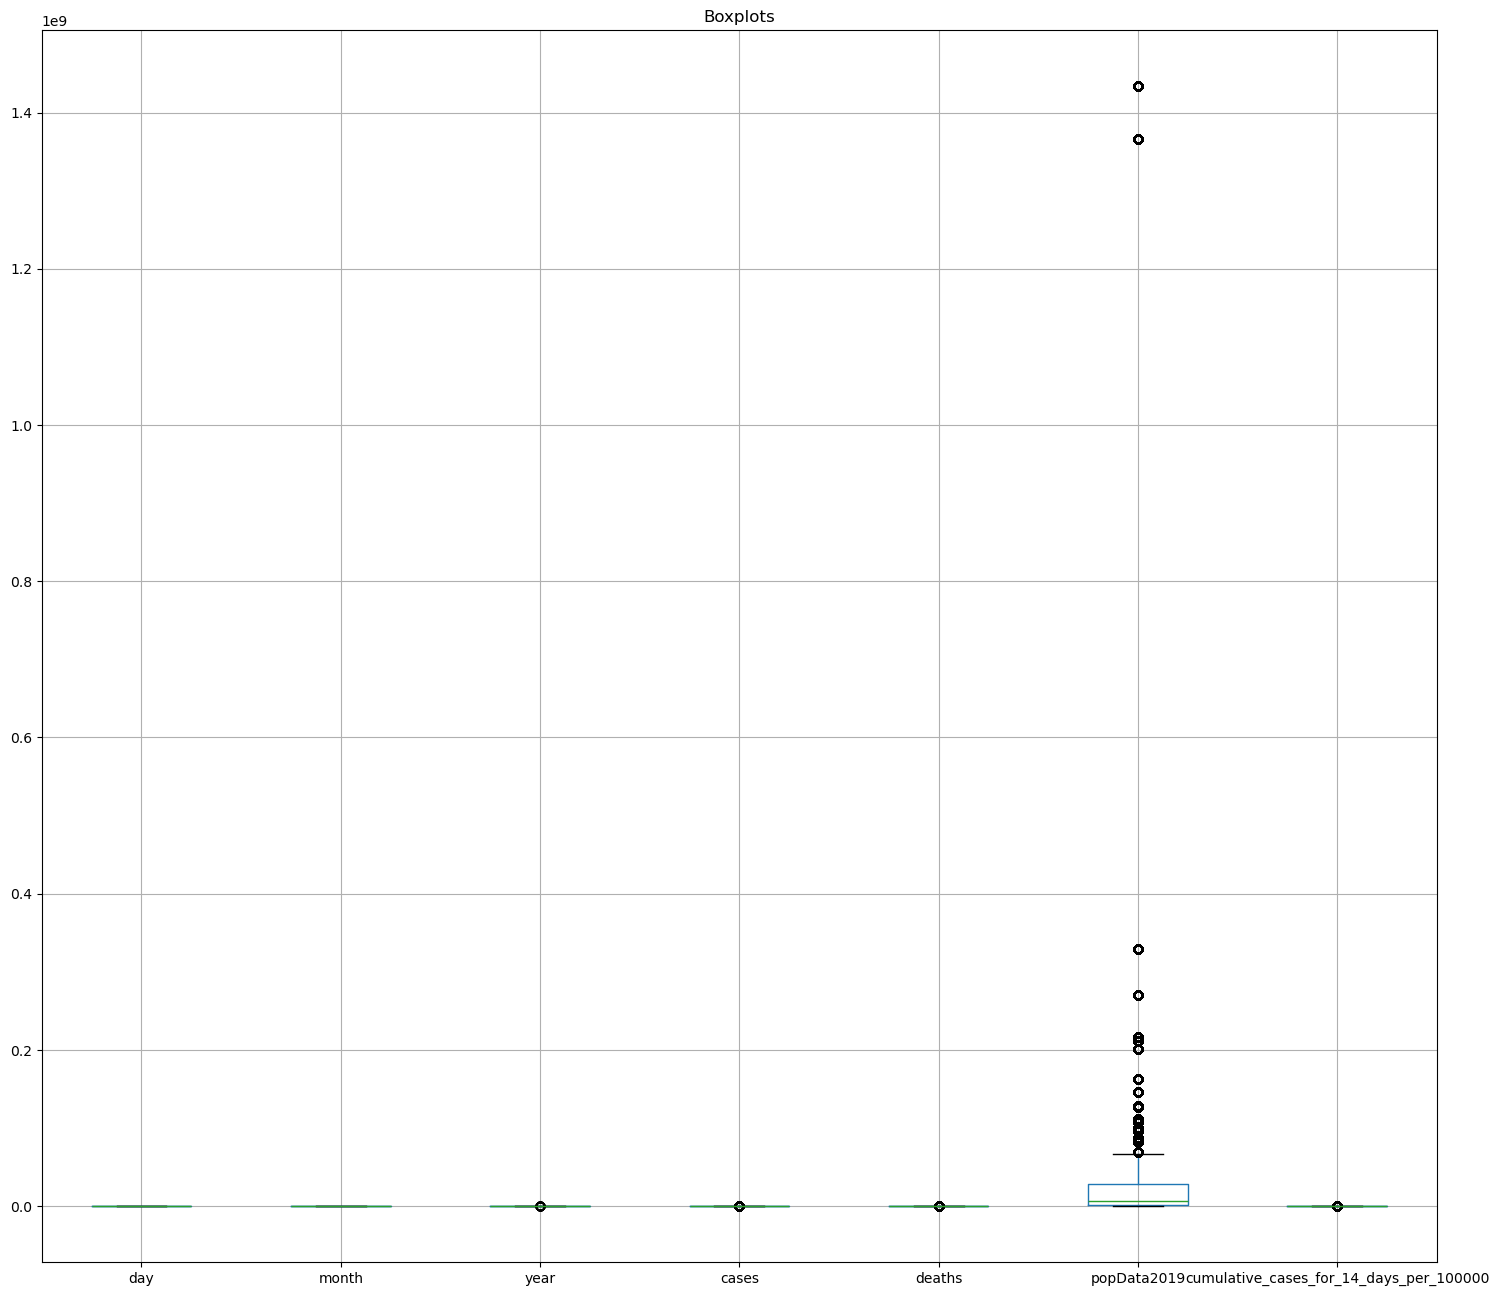

In [134]:
# Vérification des valeurs abérrantes
df.boxplot(figsize=(18, 16))
plt.title('Boxplots')
plt.show()

In [135]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2019', 'continentExp',
       'cumulative_cases_for_14_days_per_100000'],
      dtype='object')

<Axes: >

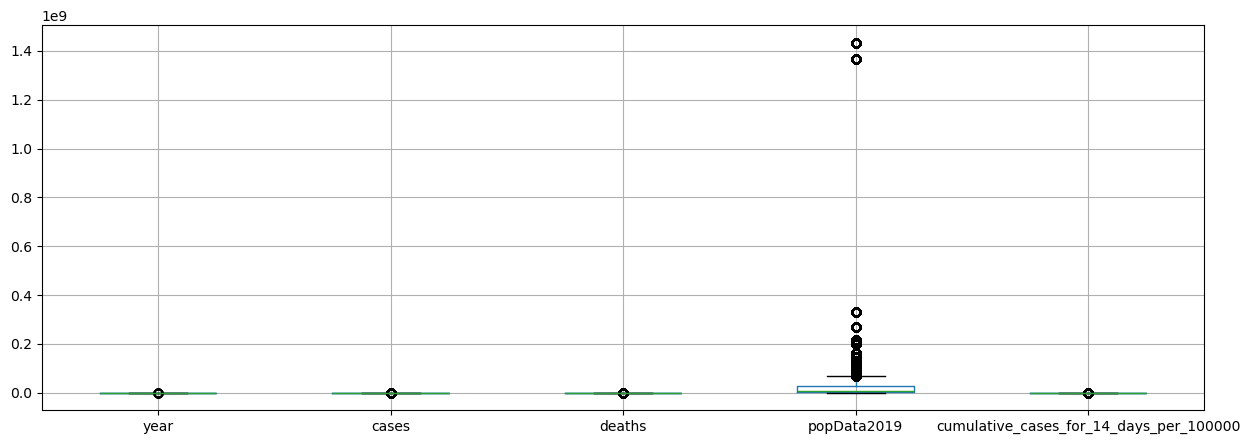

In [136]:
# Récupération des valeurs abérrantes
df[['year', 'cases', 'deaths', 'popData2019', 'cumulative_cases_for_14_days_per_100000']].boxplot(figsize=(15, 5))

In [137]:
# Analyse statistique univariée pour la compréhension de nos outliers (calcul des statistiques descriptives)
print(df['year'].describe())

count    61900.000000
mean      2019.998918
std          0.032882
min       2019.000000
25%       2020.000000
50%       2020.000000
75%       2020.000000
max       2020.000000
Name: year, dtype: float64


In [138]:
# Transformer la colonne 'year' en int64
df['year'] = df['year'].astype('int64')

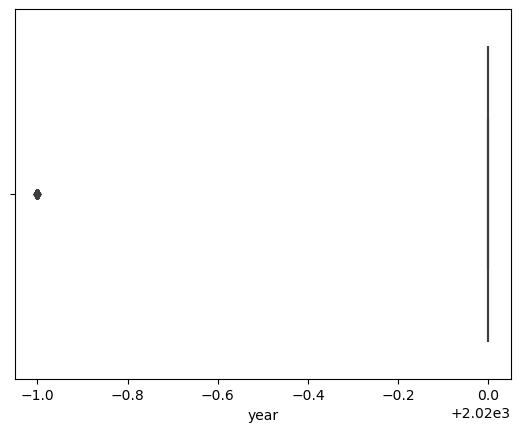

In [139]:
# Création d'un boxplot
sns.boxplot(x=df['year'])
plt.show()


In [140]:
print(df['cases'].describe())

count     61900.000000
mean       1155.147237
std        6779.224479
min       -8261.000000
25%           0.000000
50%          15.000000
75%         273.000000
max      234633.000000
Name: cases, dtype: float64


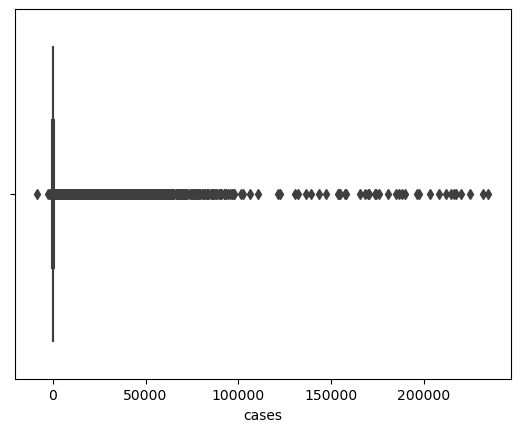

In [141]:
sns.boxplot(x=df['cases'])
plt.show()

In [142]:
print(df['deaths'].describe())

count    61900.000000
mean        26.055460
std        131.227055
min      -1918.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       4928.000000
Name: deaths, dtype: float64


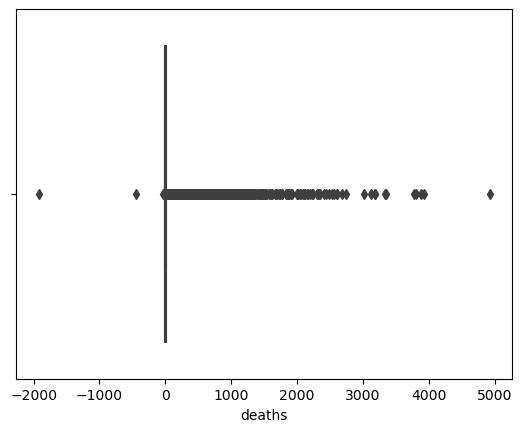

In [143]:
sns.boxplot(x=df['deaths'])
plt.show()

In [144]:
print(df['popData2019'].describe())

count    6.190000e+04
mean     4.092050e+07
std      1.529846e+08
min      8.150000e+02
25%      1.324820e+06
50%      7.169456e+06
75%      2.851583e+07
max      1.433784e+09
Name: popData2019, dtype: float64


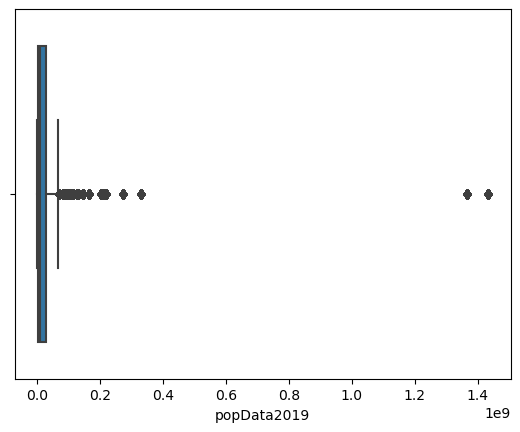

In [145]:
sns.boxplot(x=df['popData2019'])
plt.show()

In [146]:
print(df['cumulative_cases_for_14_days_per_100000'].describe())

count    61900.000000
mean        63.548721
std        159.005305
min       -147.419587
25%          0.889727
50%          6.724045
75%         46.899907
max       1900.836210
Name: cumulative_cases_for_14_days_per_100000, dtype: float64


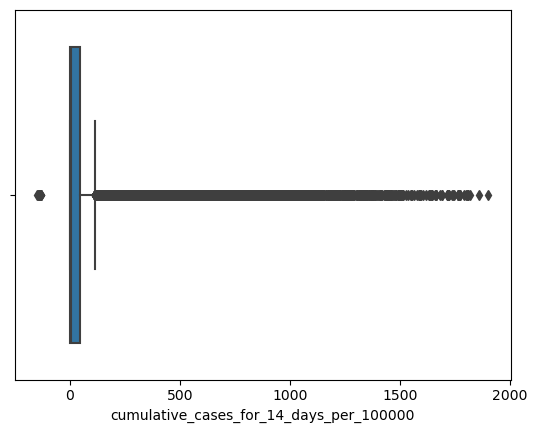

In [147]:
sns.boxplot(x=df['cumulative_cases_for_14_days_per_100000'])
plt.show()

In [148]:
# Transformer la colonne 'month' en int64
df['month'] = df['month'].astype('int64')

In [149]:
# Transformer la colonne 'day' en int64
df['day'] = df['day'].astype('int64')

C:\Users\KEPHRENE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KEPHRENE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KEPHRENE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KEPHRENE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KEPHRENE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will 

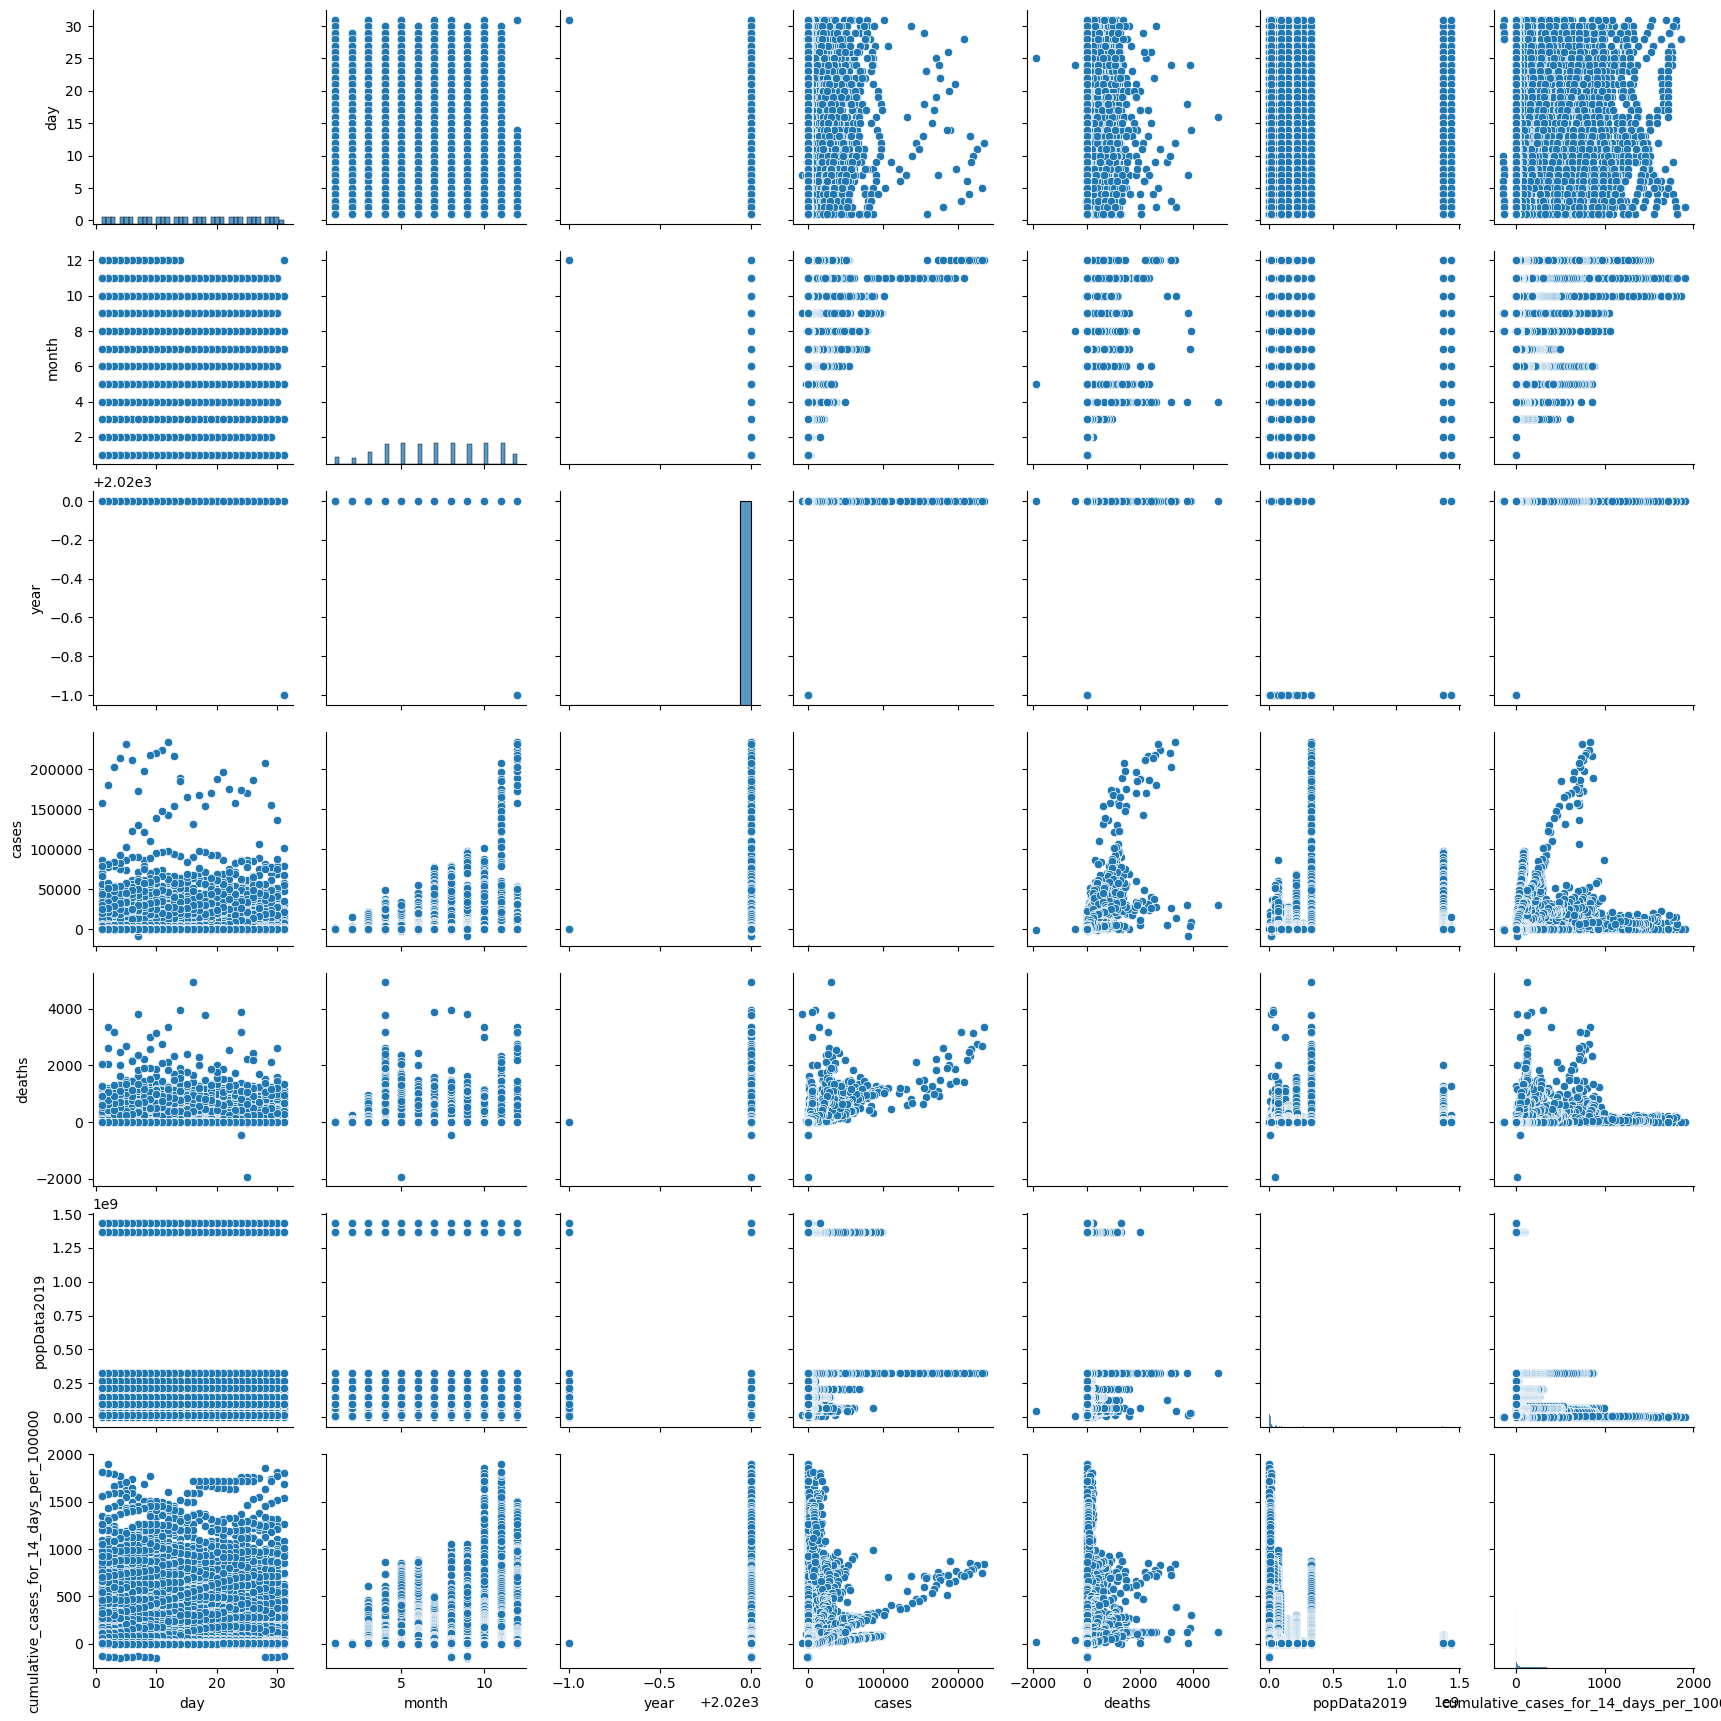

In [150]:
# Analyse multivariée pour appréhender les corrélations entre les variables
# Pairplot pour visualiser les relations entre les variables

# Utiliser seaborn pour créer un pairplot
sns.pairplot(df)
    
# Afficher le graphique
plt.show()



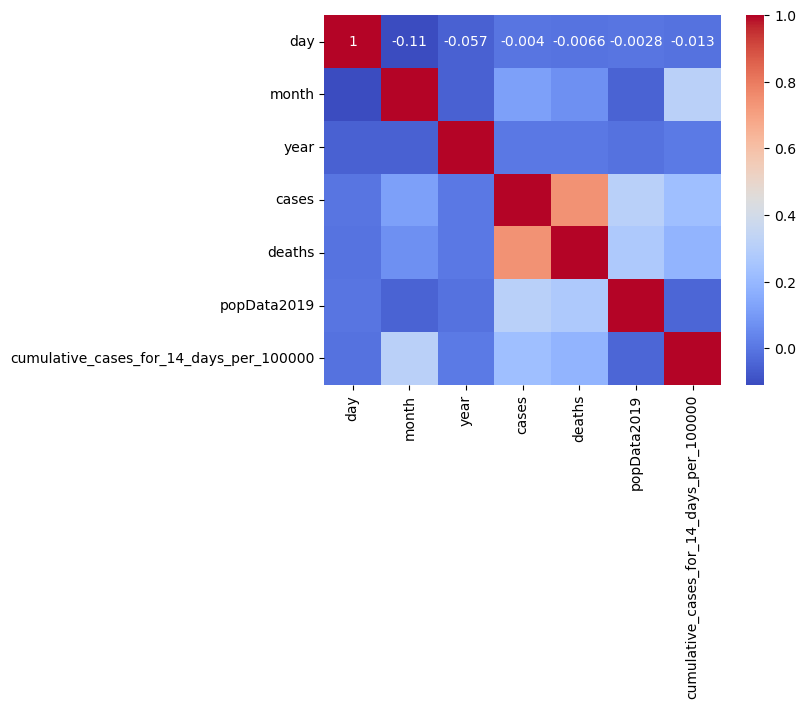

In [151]:
# Exclure les colonnes non numériques
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Visualiser la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


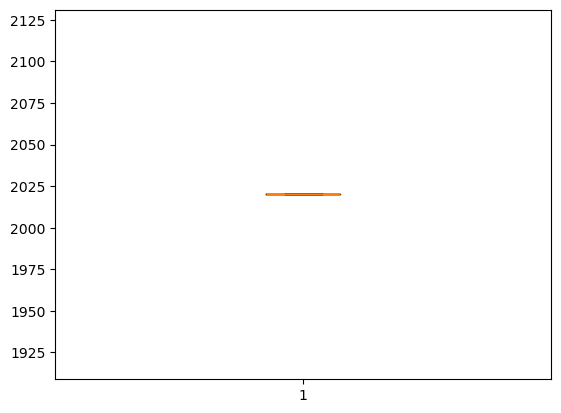

C:\Users\KEPHRENE\AppData\Local\Temp\ipykernel_3664\50020840.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-409.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



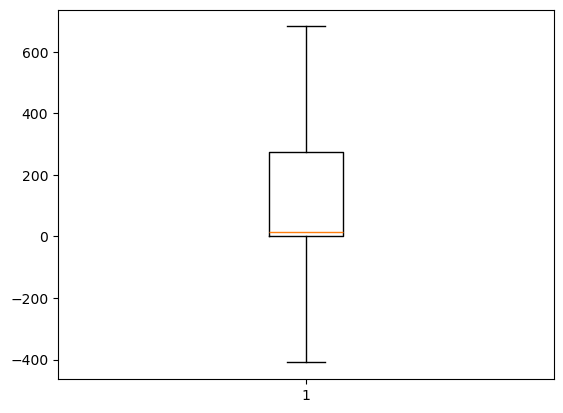

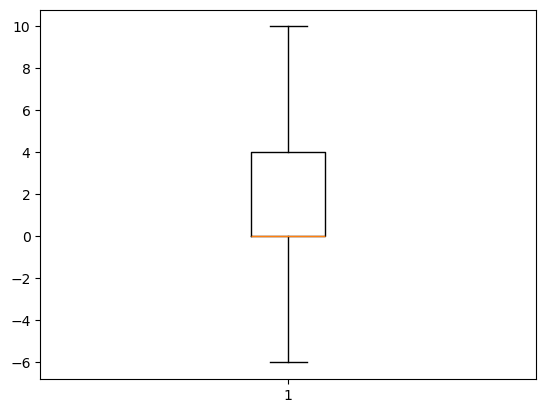

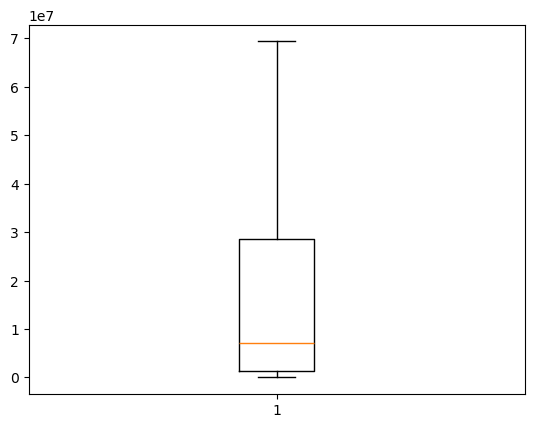

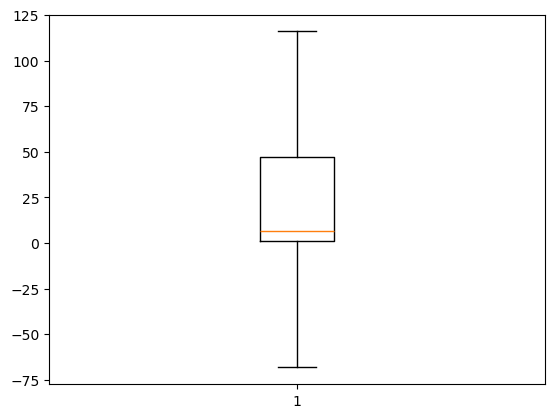

In [152]:
# Traitement des valeurs aberrantes
# Mise en place d'un feature des colonnes à traiter
features = ['year', 'cases', 'deaths', 'popData2019', 'cumulative_cases_for_14_days_per_100000']

def impute_outliers(df, feature):  
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df.loc[df[feature] < lower_bound, feature] = lower_bound 
    df.loc[df[feature] > upper_bound, feature] = upper_bound

# Remplaçons colonne par colonne les valeurs aberrantes de notre feature
for feature in features:  
    impute_outliers(df, feature)
    plt.boxplot(df[feature])
    plt.show()


###### 3.2 - Analyse statistique des données

In [153]:
# Analyser le nombre de cas et de décès liés au virus dans le monde entier
total_cases = df['cases'].sum()
total_deaths = df['deaths'].sum()

print("Nombre total de cas dans le monde entier :", total_cases)
print("Nombre total de décès dans le monde entier :", total_deaths)

Nombre total de cas dans le monde entier : 10769196.0
Nombre total de décès dans le monde entier : 157685


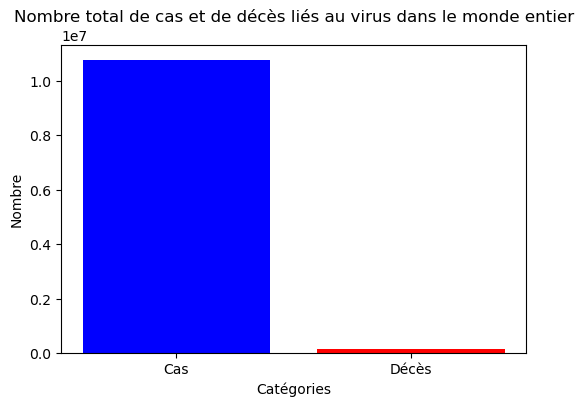

In [154]:
# Données
categories = ['Cas', 'Décès']
valeurs = [total_cases, total_deaths]

# Création du diagramme à barres
plt.figure(figsize=(6, 4))
plt.bar(categories, valeurs, color=['blue', 'red'])

# Ajout de titres et de légendes
plt.title('Nombre total de cas et de décès liés au virus dans le monde entier')
plt.xlabel('Catégories')
plt.ylabel('Nombre')
plt.show()


In [155]:
# Analyse des cas et des décès par continent
cases_by_continent = df.groupby('continentExp')['cases'].sum()
deaths_by_continent = df.groupby('continentExp')['deaths'].sum()

print("Nombre de cas par continent :\n", cases_by_continent)
print("Nombre de décès par continent :\n", deaths_by_continent)

Nombre de cas par continent :
 continentExp
Africa     1232285.0
America    2535374.5
Asia       3031397.5
Europe     3916948.5
Oceania      52494.5
Other          696.0
Name: cases, dtype: float64
Nombre de décès par continent :
 continentExp
Africa     20342
America    39601
Asia       37312
Europe     59494
Oceania      929
Other          7
Name: deaths, dtype: int64


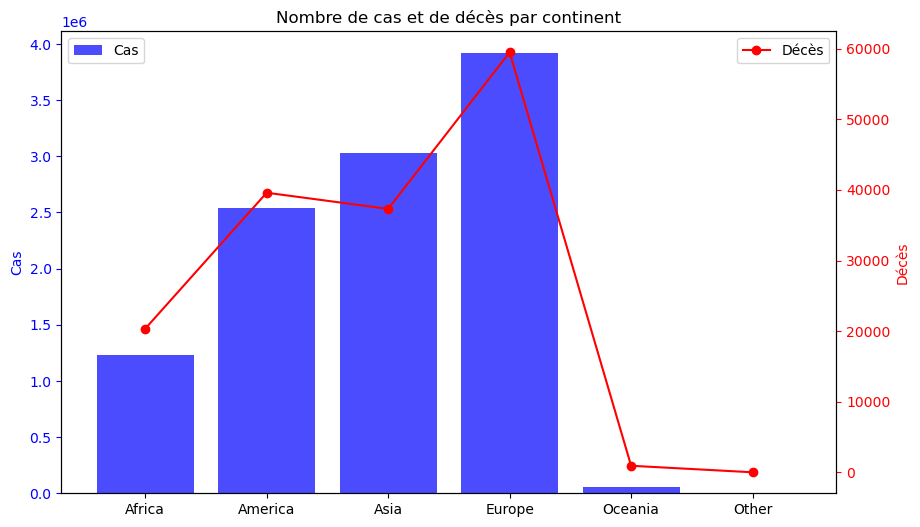

In [156]:
# Données
continents = cases_by_continent.index
cases = cases_by_continent.values
deaths = deaths_by_continent.values

# Création du diagramme
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barres pour les cas par continent
ax1.bar(continents, cases, color='b', alpha=0.7, label='Cas')
ax1.set_ylabel('Cas', color='b')
ax1.tick_params('y', colors='b')

# Création d'un deuxième axe y pour les décès
ax2 = ax1.twinx()
ax2.plot(continents, deaths, color='r', marker='o', label='Décès')
ax2.set_ylabel('Décès', color='r')
ax2.tick_params('y', colors='r')

# Ajout de légendes et de titres
plt.title('Nombre de cas et de décès par continent')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [157]:
# Analyser l'évolution temporelle du virus
# Convertir la colonne 'dateRep' en format de date
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

# Regrouper les données par date et sommer les cas et les décès pour chaque date
daily_cases = df.groupby('dateRep')['cases'].sum()
daily_deaths = df.groupby('dateRep')['deaths'].sum()

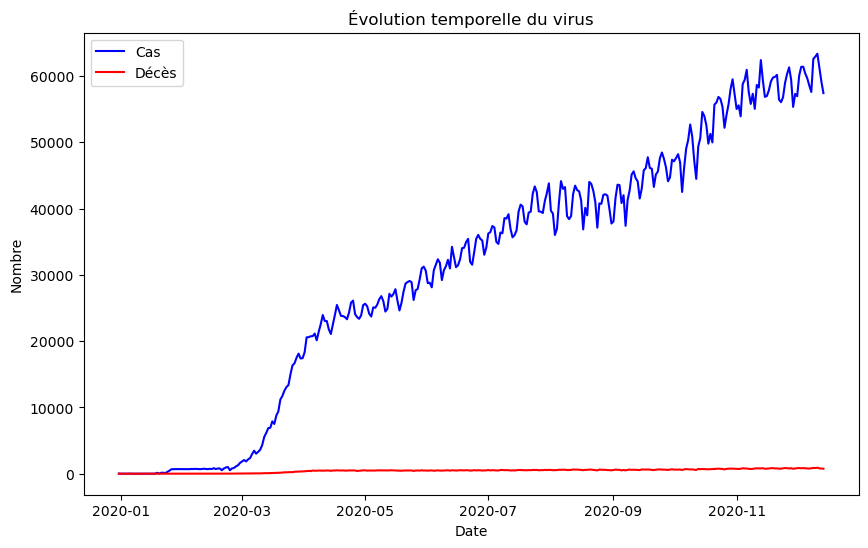

In [158]:
# Convertir la colonne 'dateRep' en format de date
df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

# Regrouper les données par date et sommer les cas et les décès pour chaque date
daily_cases = df.groupby('dateRep')['cases'].sum()
daily_deaths = df.groupby('dateRep')['deaths'].sum()

# Création du graphique
plt.figure(figsize=(10, 6))

# Courbe des cas
plt.plot(daily_cases.index, daily_cases.values, color='blue', label='Cas')

# Courbe des décès
plt.plot(daily_deaths.index, daily_deaths.values, color='red', label='Décès')

# Ajout de titres et de légendes
plt.title('Évolution temporelle du virus')
plt.xlabel('Date')
plt.ylabel('Nombre')
plt.legend()

# Affichage du graphique
plt.show()


In [159]:
#  Evaluer l'indice du virus par rapport à la population 

# Calculer le taux d'infection (nombre de cas pour 100 000 personnes)
df['infection_rate'] = (df['cases'] / df['popData2019']) * 100000

# Calculons le taux de mortalité (nombre de décès pour 100 000 personnes)
df['mortality_rate'] = (df['deaths'] / df['popData2019']) * 100000

# Afficher les premières lignes du DataFrame pour vérifier les calculs
print(df.head())

# Résumé statistique des taux d'infection et de mortalité
print(df[['infection_rate', 'mortality_rate']].describe())

     dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0 2020-12-14   14     12  2020  682.5       6             Afghanistan   
1 2020-12-13   13     12  2020  298.0       9             Afghanistan   
2 2020-12-12   12     12  2020  113.0      10             Afghanistan   
3 2020-12-11   11     12  2020   63.0      10             Afghanistan   
4 2020-12-10   10     12  2020  202.0      10             Afghanistan   

   popData2019 continentExp  cumulative_cases_for_14_days_per_100000  \
0   38041757.0         Asia                                 9.013779   
1   38041757.0         Asia                                 7.052776   
2   38041757.0         Asia                                 6.868768   
3   38041757.0         Asia                                 7.134266   
4   38041757.0         Asia                                 6.968658   

   infection_rate  mortality_rate  
0        1.794081        0.015772  
1        0.783350        0.023658  
2        0.297042   

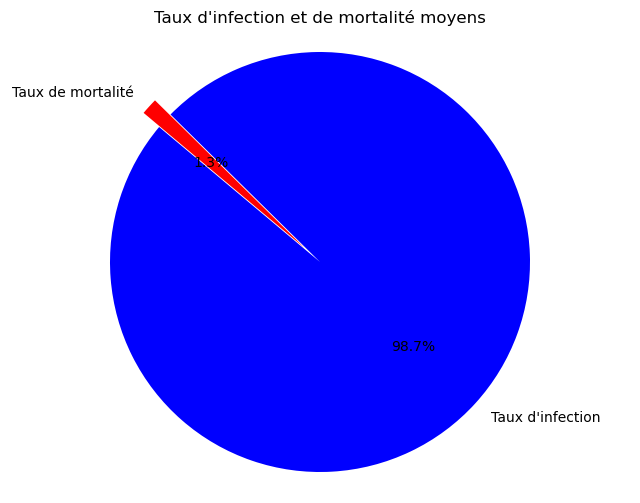

In [160]:
# Calculer les moyennes des taux d'infection et de mortalité
mean_infection_rate = df['infection_rate'].mean()
mean_mortality_rate = df['mortality_rate'].mean()

# Étiquettes
labels = ['Taux d\'infection', 'Taux de mortalité']
sizes = [mean_infection_rate, mean_mortality_rate]
colors = ['blue', 'red']
explode = (0.1, 0)  # Pour faire ressortir le premier morceau (taux d'infection)

# Créer le diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Taux d\'infection et de mortalité moyens')
plt.axis('equal')  # Assurez-vous que le diagramme soit un cercle

# Afficher le diagramme
plt.show()


In [161]:
# Déterminer le pays le plus touché et le moins touché par continent
total_cases_by_country = df.groupby(['countriesAndTerritories', 'continentExp'])['cases'].sum()
total_deaths_by_country = df.groupby(['countriesAndTerritories', 'continentExp'])['deaths'].sum()

In [162]:
# Le pays le plus touché (triez les données par nombre de cas décroissant)
most_affected_by_continent = total_cases_by_country.groupby('continentExp').idxmax()

# Le pays le moins touché (triez les données par nombre de cas croissant)
least_affected_by_continent = total_cases_by_country.groupby('continentExp').idxmin()

# Afficher 
print("Pays le plus touché sur chaque continent :\n", most_affected_by_continent)
print("\nPays le moins touché sur chaque continent :\n", least_affected_by_continent)


Pays le plus touché sur chaque continent :
 continentExp
Africa                                (South_Africa, Africa)
America                  (United_States_of_America, America)
Asia                                            (Iran, Asia)
Europe                              (United_Kingdom, Europe)
Oceania                                 (Australia, Oceania)
Other      (Cases_on_an_international_conveyance_Japan, O...
Name: cases, dtype: object

Pays le moins touché sur chaque continent :
 continentExp
Africa                                  (Seychelles, Africa)
America                                  (Anguilla, America)
Asia                                     (Timor_Leste, Asia)
Europe                                    (Holy_See, Europe)
Oceania                                   (Vanuatu, Oceania)
Other      (Cases_on_an_international_conveyance_Japan, O...
Name: cases, dtype: object


In [163]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2019', 'continentExp',
       'cumulative_cases_for_14_days_per_100000', 'infection_rate',
       'mortality_rate'],
      dtype='object')

In [164]:
import plotly.graph_objects as go

# Regrouper les données par continent et par pays, puis calculer la somme des cas
total_cases_by_country = df.groupby(['continentExp', 'countriesAndTerritories'])['cases'].sum().reset_index()

# Trouver le pays le plus touché par continent
most_affected_by_continent = total_cases_by_country.loc[total_cases_by_country.groupby('continentExp')['cases'].idxmax()]

# Créer un graphique à barres horizontales
fig = go.Figure()

# Ajouter les barres pour chaque continent
for continent, data in most_affected_by_continent.groupby('continentExp'):
    fig.add_trace(go.Bar(
        y=data['countriesAndTerritories'],
        x=data['cases'],
        name=continent,
        orientation='h'
    ))

# Mettre en forme le graphique
fig.update_layout(
    title='Pays les plus touchés par continent',
    xaxis_title='Nombre de cas',
    yaxis_title='Pays',
    barmode='stack',
    margin=dict(l=150),  # Ajustement pour le titre long du continent
    height=600
)

# Afficher le graphique
fig.show()


In [165]:
import plotly.graph_objects as go

# Regrouper les données par continent et par pays, puis calculer la somme des cas
total_cases_by_country = df.groupby(['continentExp', 'countriesAndTerritories'])['cases'].sum().reset_index()

# Trouver les pays les moins touchés par continent
least_affected_by_continent = total_cases_by_country.loc[total_cases_by_country.groupby('continentExp')['cases'].idxmin()]

# Créer un graphique à barres horizontales
fig = go.Figure()

# Ajouter les barres pour chaque continent
for continent, data in least_affected_by_continent.groupby('continentExp'):
    fig.add_trace(go.Bar(
        y=data['countriesAndTerritories'],
        x=data['cases'],
        name=continent,
        orientation='h'
    ))

# Mettre en forme le graphique
fig.update_layout(
    title='Pays les moins touchés par continent',
    xaxis_title='Nombre de cas',
    yaxis_title='Pays',
    barmode='stack',
    margin=dict(l=150),  # Ajustement pour le titre long du continent
    height=600
)

# Afficher le graphique
fig.show()

###### 3.3 - Transformation des données 

In [166]:
df.dtypes 

dateRep                                    datetime64[ns]
day                                                 int64
month                                               int64
year                                                int64
cases                                             float64
deaths                                              int64
countriesAndTerritories                            object
popData2019                                       float64
continentExp                                       object
cumulative_cases_for_14_days_per_100000           float64
infection_rate                                    float64
mortality_rate                                    float64
dtype: object

In [167]:
# Supposons que colonnes_non_numeriques contient les noms des colonnes non numériques
colonnes_non_numeriques = df.select_dtypes(include=['object']).columns.tolist()

# Créez un dictionnaire de remplacement pour chaque colonne
remplacement = {}

for colonne in colonnes_non_numeriques:
    valeurs_uniques = df[colonne].unique()
    remplacement[colonne] = {val: idx for idx, val in enumerate(valeurs_uniques)}

# Appliquez le remplacement pour chaque colonne
for colonne, mapping in remplacement.items():
    df[colonne] = df[colonne].replace(mapping)

# df maintenant contient les variables qualitatives encodées en variables numériques


In [168]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Afficher les types de données dans votre dataframe
print(df.dtypes)

# Sélectionner les colonnes à standardiser/normaliser (suppose que vous excluez les colonnes non numériques)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_columns) == 0:
    print("Aucune colonne numérique à standardiser ou normaliser dans le dataframe.")
else:
    # Standardisation
    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Normalisation Min-Max
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])


dateRep                                    datetime64[ns]
day                                                 int64
month                                               int64
year                                                int64
cases                                             float64
deaths                                              int64
countriesAndTerritories                             int64
popData2019                                       float64
continentExp                                        int64
cumulative_cases_for_14_days_per_100000           float64
infection_rate                                    float64
mortality_rate                                    float64
dtype: object


###### 4 - Modélisation des données
###### Objectif: prédire le nombre futur de cas temporels sur la base des données actuelles. 

In [169]:
# Importer les librairies
#import statsmodels.api as sm

#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
#from sklearn.feature_selection import SelectKBest, chi2, f_regression

#from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
#from xgboost import XGBRegressor
#from sklearn.neural_network import MLPRegressor

#from sklearn.metrics import mean_squared_error, r2_score

In [170]:
# Données d'entraînement et de test
#y = df['cumulative_cases_for_14_days_per_100000']

# Supprimer les colonnes 'cumulative_cases_for_14_days_per_100000' et 'dateRep'
#X = df.drop(['cumulative_cases_for_14_days_per_100000', 'dateRep', 'countriesAndTerritories', 'continentExp' ], axis=1)

#validation_size = 0.25

#train_size = int(len(X) * (1 - validation_size))

#X_train, X_test = X[0:train_size], X[train_size:len(X)]

#Y_train, Y_test = y[0:train_size], y[train_size:len(X)]

In [171]:
#X_train.shape

In [172]:
#Y_train.shape

In [173]:
#X_test.shape

In [174]:
#Y_test.shape

In [175]:
# suppresion des lignes avec des valeurs infinies
#df = df[~df['infection_rate'].isin([np.inf, -np.inf])]
#df = df[~df['mortality_rate'].isin([np.inf, -np.inf])]

In [176]:
# Liste des algorithmes à entraîner

#seed = 123

#models = []

#models.append(('LR', {'model':LinearRegression()}))
#models.append(('LASSO', {'model':Lasso()}))
#models.append(('EN', {'model':ElasticNet()}))
#models.append(('KNN', {'model':KNeighborsRegressor()}))
#models.append(('CART', {'model':DecisionTreeRegressor(random_state = seed)}))
#models.append(('SVR', {'model':SVR()}))

#models.append(('MLP', {'model':MLPRegressor(random_state = seed)}))

#models.append(('ABR', {'model':AdaBoostRegressor(random_state = seed)}))
#models.append(('XGBOOST', {'model':XGBRegressor(random_state=seed)}))
#models.append(('GBR', {'model':GradientBoostingRegressor(random_state = seed)}))

#models.append(('RFR', {'model':RandomForestRegressor(random_state = seed)}))
#models.append(('ETR', {'model':ExtraTreesRegressor(random_state = seed)}))

In [177]:
#algos_ml = dict(models)
#algos_ml

In [178]:
#num_folds = 5
#scoring = 'neg_mean_squared_error'
#kfold_results = []

#for model_name in algos_ml.keys():
    
    #kfold = KFold(n_splits=num_folds)
    #Conversion de 'neg_mean_squared_error' en valeur positive pour calculer RMSE (racine carrée de MSE)
                # plus l'erreur est faible, plus le modèle est performant
    #cv_results = np.sqrt(-1* cross_val_score(algos_ml[model_name]['model'], X_train, Y_train, cv=kfold, scoring=scoring))
    #kfold_results.append(cv_results)
    #algos_ml[model_name]['Mean CV results'] = cv_results.mean()
    #algos_ml[model_name]['Std CV results'] = cv_results.std()
    
    #fitted_model = algos_ml[model_name]['model'].fit(X_train, Y_train)
    #algos_ml[model_name]['RMSE train'] = np.sqrt(mean_squared_error(Y_train, fitted_model.predict(X_train)))
    #algos_ml[model_name]['RMSE test'] = np.sqrt(mean_squared_error(Y_test, fitted_model.predict(X_test)))
    #algos_ml[model_name]['R² train'] = r2_score(Y_train, fitted_model.predict(X_train))
    #algos_ml[model_name]['R² test'] = r2_score(Y_test, fitted_model.predict(X_test))

In [179]:
#algos_ml

In [180]:
# Affichage des meilleurs modèles sous forme de tableau

#results_metrics = pd.DataFrame.from_dict(
    #algos_ml, 
    #'index')[['RMSE train', 'RMSE test', 'Mean CV results', 'Std CV results', 'R² train', 'R² test']]

#with pd.option_context('display.precision', 3):
    #best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

#best_print

In [181]:
# Comparaison des résultats de la valisation croisée

#fig = plt.figure()
#fig.suptitle('Comparaison des résultats de la valisation croisée')
#ax = fig.add_subplot(111)
#plt.boxplot(kfold_results)
#ax.set_xticklabels(list(algos_ml.keys()))
#fig.set_size_inches(10,6)
#plt.ylabel('Erreur quadratique moyenne')
#plt.show()

In [182]:
# Comparaison des Erreurs d'entraînement et de test pour tous les modèles

#best_print[['RMSE train', 'RMSE test']].plot(kind = 'bar');

In [183]:
# Modèle final

#best_model = algos_ml['GBR']['model']
#best_model

In [184]:
# Fonction d'évaluation du modèle

#def evaluate_model(nom_model, predictions):
    #plt.figure(figsize = (10, 6))
    #l1, = plt.plot(Y_test.index, np.exp(Y_test).cumprod(), label = 'Observation')
    #l2, = plt.plot(Y_test.index, predictions, label = 'Prediction')
    #plt.legend(handles = [l1, l2])
    #plt.show()

In [187]:
print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2019', 'continentExp',
       'cumulative_cases_for_14_days_per_100000', 'infection_rate',
       'mortality_rate'],
      dtype='object')


In [188]:
# Importer les librairies
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [189]:
df.dtypes

dateRep                                    datetime64[ns]
day                                                 int64
month                                               int64
year                                                int64
cases                                             float64
deaths                                              int64
countriesAndTerritories                             int64
popData2019                                       float64
continentExp                                        int64
cumulative_cases_for_14_days_per_100000           float64
infection_rate                                    float64
mortality_rate                                    float64
dtype: object

In [190]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2019,continentExp,cumulative_cases_for_14_days_per_100000,infection_rate,mortality_rate
0,2020-12-14,14,12,2020,682.5,6,0,38041757.0,0,9.013779,1.794081,0.015772
1,2020-12-13,13,12,2020,298.0,9,0,38041757.0,0,7.052776,0.783350,0.023658
2,2020-12-12,12,12,2020,113.0,10,0,38041757.0,0,6.868768,0.297042,0.026287
3,2020-12-11,11,12,2020,63.0,10,0,38041757.0,0,7.134266,0.165607,0.026287
4,2020-12-10,10,12,2020,202.0,10,0,38041757.0,0,6.968658,0.530995,0.026287


In [191]:
# Séparation des données en ensembles d'entraînement et de test
X = df.drop(columns=['dateRep', 'cases'], axis=1)
y = df['cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Liste des algorithmes à entraîner
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}


In [193]:
# Entraînement des modèles et évaluation de leur performance
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_score = cross_val_score(model, X, y, cv=5).mean()
    results.append([name, rmse, cv_score])
    
    

In [194]:
# Affichage des meilleurs modèles sous forme de tableau
print(tabulate(results, headers=['Model', 'RMSE', 'Cross Validation Score']))

Model                  RMSE    Cross Validation Score
-----------------  --------  ------------------------
Linear Regression  117.955                   0.790547
Random Forest        6.6781                  0.986559


In [195]:
# Comparaison des erreurs d'entraînement et de test pour tous les modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"{name}: Train RMSE = {train_rmse}, Test RMSE = {test_rmse}")

Linear Regression: Train RMSE = 116.70424651756457, Test RMSE = 117.95509298457752
Random Forest: Train RMSE = 2.7763285183677855, Test RMSE = 6.847242404946693


In [196]:
# Sélection du meilleur modèle
best_model = min(results, key=lambda x: x[1])[0]

In [197]:
#Modèle final
final_model = models[best_model]

In [198]:
#Fonction d'évaluation du modèle
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

In [199]:
import plotly.graph_objects as go

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Créer une figure Plotly
    fig = go.Figure()

    # Ajouter les valeurs réelles et prédites au graphique
    fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', name='Actual vs Predicted'))

    # Ajouter une ligne diagonale pour montrer la relation idéale
    fig.add_trace(go.Scatter(x=y, y=y, mode='lines', line=dict(color='red'), name='Ideal'))

    # Mettre en forme le graphique
    fig.update_layout(title='Actual vs Predicted',
                      xaxis_title='Actual',
                      yaxis_title='Predicted')

    # Afficher le graphique
    fig.show()

# Utilisation de la fonction pour évaluer un modèle
evaluate_model(model, X_test, y_test)


In [200]:
# Observations réelles et prédictions du modèle
predictions = final_model.predict(X_test)
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df_predictions.head())

       Actual  Predicted
32279     0.0       0.00
38184     0.0       0.00
7007    419.0     440.50
52942   682.5     682.50
57647    23.0      22.62


In [201]:
import plotly.graph_objects as go

# Création du graphique en nuage de points
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_predictions['Actual'], y=df_predictions['Predicted'], mode='markers', name='Actual vs Predicted'))

# Ajout de la ligne diagonale pour la relation idéale
fig.add_trace(go.Scatter(x=df_predictions['Actual'], y=df_predictions['Actual'], mode='lines', line=dict(color='red'), name='Ideal'))

# Mise en forme du graphique
fig.update_layout(title='Actual vs Predicted',
                  xaxis_title='Actual',
                  yaxis_title='Predicted')

# Affichage du graphique
fig.show()
